In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/dataset/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/dataset/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/dataset/train/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/Asian')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/Asian')))

420
420
97
91


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
21/21 [==============================] - 182s 8s/step - loss: 0.7265 - accuracy: 0.5104 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 114s 5s/step - loss: 0.6945 - accuracy: 0.5357 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 118s 5s/step - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 4/30
21/21 [==============================] - 115s 5s/step - loss: 0.6752 - accuracy: 0.6057 - val_loss: 0.7144 - val_accuracy: 0.5476
Epoch 5/30
21/21 [==============================] - 114s 5s/step - loss: 0.6391 - accuracy: 0.6384 - val_loss: 0.7191 - val_accuracy: 0.5833
Epoch 6/30
21/21 [==============================] - 114s 5s/step - loss: 0.5791 - accuracy: 0.6860 - val_loss: 0.7395 - val_accuracy: 0.5119
Epoch 7/30
21/21 [==============================] - 113s 5s/step - loss: 0.4918 - accuracy: 0.7530 - val_loss: 0.9033 - val_accuracy: 0.4940
Epoch 8/30
21

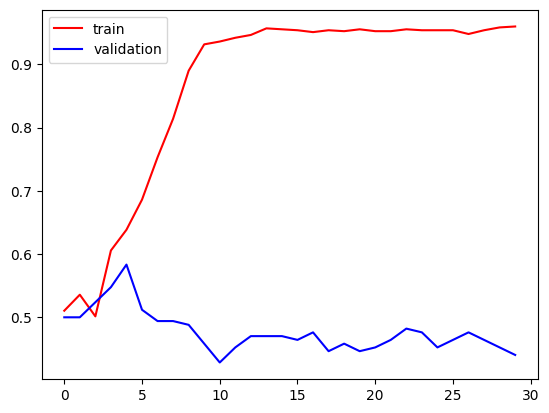

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

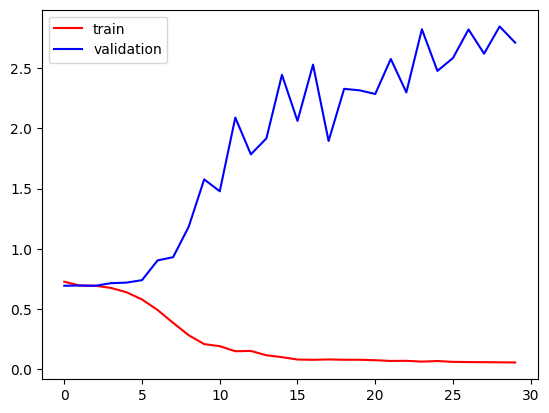

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

6/6 [==============================] - 95s 18s/step
[[3.3672464e-01]
 [6.7959934e-01]
 [9.9999976e-01]
 [9.9999505e-01]
 [9.9987847e-01]
 [5.3031009e-01]
 [9.9984181e-01]
 [4.2335504e-01]
 [2.3817159e-03]
 [9.8758924e-01]
 [5.2589673e-01]
 [8.6964958e-04]
 [3.8558233e-03]
 [9.8822361e-01]
 [2.2551761e-04]
 [1.4005793e-02]
 [1.9786177e-05]
 [8.9226067e-01]
 [9.9986786e-01]
 [9.9998915e-01]
 [9.8900533e-01]
 [2.7143702e-02]
 [3.0719169e-04]
 [9.9975389e-01]
 [9.9999952e-01]
 [9.9176449e-01]
 [1.7844902e-02]
 [1.8229734e-05]
 [9.9966431e-01]
 [8.4028357e-01]
 [6.2980598e-01]
 [6.0367221e-01]
 [9.6937287e-01]
 [1.1674453e-01]
 [1.5950467e-02]
 [9.9716353e-01]
 [2.5682224e-04]
 [9.9082375e-01]
 [4.4983584e-02]
 [3.7447546e-02]
 [9.7291857e-01]
 [4.4767093e-03]
 [9.9591953e-01]
 [5.8980133e-02]
 [9.9615216e-01]
 [9.9997711e-01]
 [1.1272830e-03]
 [1.0000000e+00]
 [9.9960035e-01]
 [9.3574238e-01]
 [9.9985218e-01]
 [2.7360080e-05]
 [1.0000000e+00]
 [2.7656867e-03]
 [9.9999529e-01]
 [9.9986136e-

In [ ]:
len(predictions)

188

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[41 56]
 [34 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        97
           1       0.50      0.63      0.56        91

    accuracy                           0.52       188
   macro avg       0.53      0.52      0.52       188
weighted avg       0.53      0.52      0.52       188

